# Pymaceuticals Inc.
### Analysis

A clinical trial was conducted for the treatment of squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. The trial consisted of ten drug regimens to compare the results against the currently marketed drug Capomulin. The trial included subjects treated for SCC over 45 days and measured the change in tumor volume. The objective of the study is to determine if any alternative formulations can be marketed without an impact on efficacy.
<br>
<br>
**Capomulin**, **Ramicane**, **Infubinol**, and **Ceftamin** performed the best over the trial period, with Ramicane showing slightly improved performance over Capomulin. Both regimens showed a 30% tumor volume reduction, while Infubinol and Ceftamin were minimally effective compared to the placebo. Ramicane can be marketed similarly to Capomulin.
<br>
<br>
**The trial period should be extended to 60 days** to investigate long-term efficacy. Test subject L509 exhibited behavior showing an increase in tumor volume from day 35 to day 45. A similar increase in tumor volume from day 25 to day 30 was followed by a sharp drop in tumor volume. Increasing the trial length will help characterize long-term efficacy.
<br>
<br>
**Further investigation is needed to determine the effective dosage.** Test subjects treated with Capomulin showed a positive linear correlation between tumor volume and weight, indicating that the dosage may need to increase for larger test subjects.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

#Read the mouse data and the study results
mouse_metadata = pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")

#Combine the data into a single DataFrame
dataset_raw = pd.merge(mouse_metadata, study_results, on="Mouse ID")

#Display the data table for preview
dataset_raw

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
#Checking the number of mice
len(dataset_raw["Mouse ID"].unique())

249

In [3]:
#Drop any duplicates based on unique time and name
dataset_dropped = dataset_raw.drop_duplicates(subset=["Mouse ID", "Timepoint"])

dataset_dropped

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
#Get the dropped rows by comparing the original DataFrame with the resulting DataFrame
dropped_rows = dataset_raw[~dataset_raw.index.isin(dataset_dropped.index)]

#Print the dropped rows
dropped_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Create a new dataset that excludes g989 from the trial
dataset = dataset_raw.loc[dataset_raw["Mouse ID"] != "g989"]
dataset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#Verify the duplicates were dropped from raw data (previously n = 249)
len(dataset["Mouse ID"].unique())

248

## Summary Statistics

Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.  Use `groupby` and `summary statistical methods` to calculate the following properties of each drug regimen:

`mean, median, variance, standard deviation, and standard error measurement (SEM)`

Assemble the resulting series into a single summary DataFrame.

In [7]:
#Remove all but the Tumor Volume (mm3) column
tumor_df = dataset[["Drug Regimen", "Tumor Volume (mm3)"]]

tumor_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [8]:
#Calculate the summary statistics using groupby and rename the column
regimen_avg = tumor_df.groupby("Drug Regimen").mean()
regimen_avg = regimen_avg.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})

regimen_med = tumor_df.groupby("Drug Regimen").median()
regimen_med = regimen_med.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})

regimen_var = tumor_df.groupby("Drug Regimen").var()
regimen_var = regimen_var.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})

regimen_std = tumor_df.groupby("Drug Regimen").std()
regimen_std = regimen_std.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})

regimen_sem = tumor_df.groupby("Drug Regimen").sem()
regimen_sem = regimen_sem.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

#Intermediate merging to add all of these together (ugly but works!)
df_1 = pd.merge(regimen_avg, regimen_med, on="Drug Regimen")
df_2 = pd.merge(regimen_var, regimen_std, on="Drug Regimen")
df_3 = pd.merge(df_1, df_2, on="Drug Regimen")
regimen_summary = pd.merge(df_3, regimen_sem, on="Drug Regimen")

regimen_summary = regimen_summary.style.set_properties(**{"text-align": "center"})

regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Aggregation Method
regimen_summary_1 = tumor_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})
regimen_summary_1 = regimen_summary_1.style.set_properties(**{"text-align": "center"})

regimen_summary_1

## Bar and Pie Charts

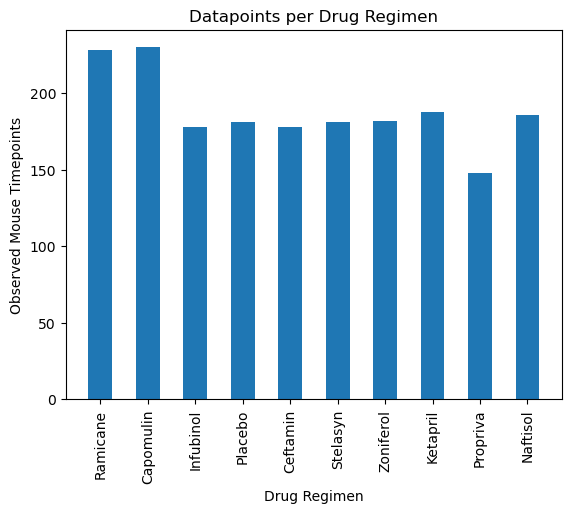

In [10]:
#Generate a bar plot for Mouse ID/Timepoints for each drug regimen using Matplotlib
drugs = dataset["Drug Regimen"].unique()
counts = [sum(dataset["Drug Regimen"] == drug) for drug in drugs]

plt.bar(drugs, counts, width = 0.5)
plt.xticks(rotation=90)
plt.title("Datapoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Observed Mouse Timepoints")

plt.show()

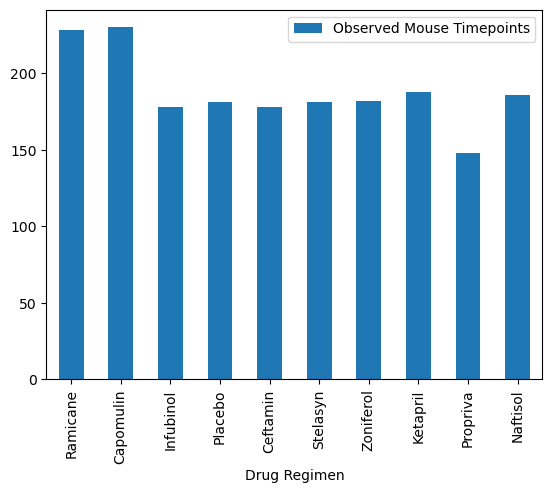

In [11]:
#Generate a bar plot for Mouse ID/Timepoints for each drug regimen using DataFrames
drug_counts = pd.DataFrame({
    "Drug Regimen": drugs,
    "Observed Mouse Timepoints": counts
})
drug_counts.plot(kind="bar", x="Drug Regimen")


plt.show()

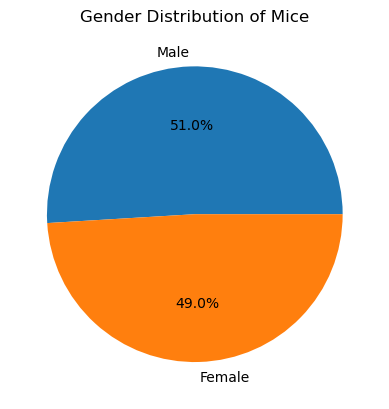

In [12]:
#Generate a pie plot showing the distribution of female versus male mice using Matplotlib
sex = dataset["Sex"].unique()
sex_dist = [sum(dataset["Sex"] == sex) for sex in sex]

plt.pie(sex_dist, labels=sex, autopct="%1.1f%%")
plt.title("Gender Distribution of Mice")
plt.show()

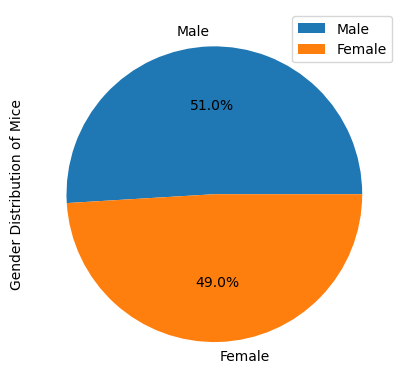

In [13]:
#Generate a pie plot showing the distribution of female versus male mice using DataFrames
sex_counts = pd.DataFrame({
    "Sex": sex,
    "Gender Distribution of Mice": sex_dist
})
sex_counts.plot(kind="pie", y="Gender Distribution of Mice", labels=sex, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
#Find the max Timepoint for each unique Mouse ID
max_timepoint = dataset.groupby("Mouse ID")["Timepoint"].max()

#Extract the tumor volume at the index location of each max timepoint
final_tumor_volume = dataset.loc[dataset.groupby("Mouse ID")["Timepoint"].idxmax(), "Tumor Volume (mm3)"]
initial_tumor_volume = dataset.loc[dataset.groupby("Mouse ID")["Timepoint"].idxmin(), "Tumor Volume (mm3)"]

#Create new DataFrame that has the Final Tumor Volume for each Mouse ID
final_tumor = pd.DataFrame({
    'Mouse ID': max_timepoint.index,
    'Final Tumor Volume (mm3)': final_tumor_volume.values,
})

final_tumor

,Mouse ID,Final Tumor Volume (mm3)
0,a203,67.973419
1,a251,65.525743
2,a262,70.717621
3,a275,62.999356
4,a366,63.440686
...,...,...
243,z435,48.710661
244,z578,30.638696
245,z581,62.754451
246,z795,65.741070


In [15]:
#Merge this DataFrame into the larger DataFrame
dataset_final = pd.merge(dataset, final_tumor, on="Mouse ID")

dataset_final

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,73.867845
1876,z969,Naftisol,Male,9,30,30,65.841013,3,73.867845
1877,z969,Naftisol,Male,9,30,35,69.176246,4,73.867845
1878,z969,Naftisol,Male,9,30,40,70.314904,4,73.867845


In [16]:
#Create our statistics for the four drugs selected
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
quantiles = [0.25, 0.50, 0.75]
summary_data = []

for drug in drug_list:
    quartiles_drug = dataset_final.loc[dataset_final["Drug Regimen"] == drug, "Final Tumor Volume (mm3)"].quantile(quantiles)
    lowerq_drug = quartiles_drug[0.25]
    upperq_drug = quartiles_drug[0.75]
    iqr_drug = upperq_drug - lowerq_drug
    upperbound_drug = upperq_drug + (1.5*iqr_drug)
    lowerbound_drug = lowerq_drug - (1.5*iqr_drug)
    
    summary_data.append({
        "Drug Regimen": drug,
        "Lower Quartiles": lowerq_drug,
        "Upper Quartiles": upperq_drug,
        "IQR": iqr_drug,
        "Upper Bound": upperbound_drug,
        "Lower Bound": lowerbound_drug
    })

summary_stats = pd.DataFrame(summary_data)
summary_stats

,Drug Regimen,Lower Quartiles,Upper Quartiles,IQR,Upper Bound,Lower Bound
0,Capomulin,32.377357,40.159220,7.781863,51.832015,20.704562
1,Ramicane,31.095335,38.810366,7.715031,50.382913,19.522788
2,Infubinol,57.031862,66.196912,9.165050,79.944486,43.284287
3,Ceftamin,59.741901,64.729837,4.987936,72.211740,52.259997


In [17]:
#Running into issues with creating the boxplot using the drug_list series created above
#Filtering a copy of the dataset_final for the four drugs to generate the plot
dataset_filtered = dataset_final.copy()

dataset_filtered = dataset_filtered.loc[(dataset_filtered["Drug Regimen"] == "Capomulin") |
                                        (dataset_filtered["Drug Regimen"] == "Ramicane") |
                                        (dataset_filtered["Drug Regimen"] == "Infubinol") |
                                        (dataset_filtered["Drug Regimen"] == "Ceftamin")]

dataset_filtered

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,0,45.000000,0,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,22.050126
...,...,...,...,...,...,...,...,...,...
1855,z581,Infubinol,Female,24,25,25,54.316407,2,62.754451
1856,z581,Infubinol,Female,24,25,30,56.286750,2,62.754451
1857,z581,Infubinol,Female,24,25,35,58.628399,3,62.754451
1858,z581,Infubinol,Female,24,25,40,60.053740,3,62.754451


In [18]:
#Outlier DataFrame
outliers_raw = pd.merge(dataset_filtered, summary_stats, on="Drug Regimen")
outliers_df = outliers_raw[["Mouse ID",
                            "Drug Regimen",
                            "Sex",
                            "Age_months",
                            "Weight (g)",
                            "Final Tumor Volume (mm3)",
                            "Upper Bound",
                            "Lower Bound"]]

outliers_table = outliers_df.loc[(outliers_df["Final Tumor Volume (mm3)"] > outliers_df["Upper Bound"]) |
                                  (outliers_df["Final Tumor Volume (mm3)"] < outliers_df["Lower Bound"])
                                ]

print(f"Mouse IDs: {outliers_table['Mouse ID'].unique()}")
print(f"Drug Regimen: {outliers_table['Drug Regimen'].unique()}")

Mouse IDs: ['c326' 'b447' 'f436' 'h531' 'l558' 't573' 'u153' 'x226']
Drug Regimen: ['Infubinol' 'Ceftamin']


In [19]:
#Summary Table for Outliers
outliers_summary = outliers_table.groupby(["Mouse ID", "Drug Regimen"]).mean()
outliers_summary = outliers_summary.reset_index()[["Mouse ID", "Drug Regimen"]]

outliers_summary

C:\Users\grant\AppData\Local\Temp\ipykernel_2340\71952567.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  outliers_summary = outliers_table.groupby(["Mouse ID", "Drug Regimen"]).mean()


,Mouse ID,Drug Regimen
0,b447,Ceftamin
1,c326,Infubinol
2,f436,Ceftamin
3,h531,Ceftamin
4,l558,Ceftamin
5,t573,Ceftamin
6,u153,Ceftamin
7,x226,Ceftamin


C:\Users\grant\AppData\Local\Temp\ipykernel_2340\3507595544.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  boxplot_df = dataset_filtered.groupby(["Mouse ID", "Drug Regimen"]).mean().reset_index()


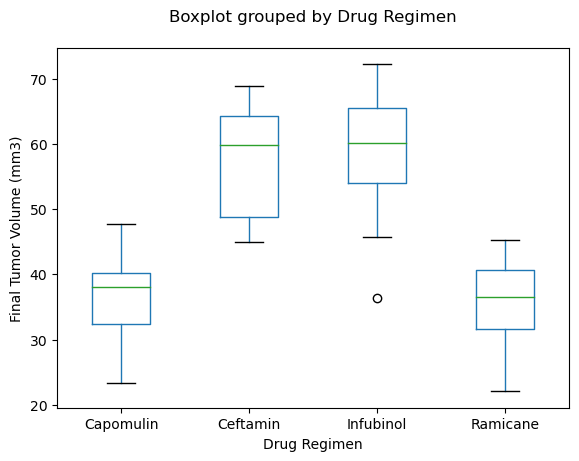

In [20]:
#Create a boxplot for the four drugs
boxplot_df = dataset_filtered.groupby(["Mouse ID", "Drug Regimen"]).mean().reset_index()
boxplot_df.boxplot(column="Final Tumor Volume (mm3)", by="Drug Regimen", rot=0, grid=False)

plt.ylabel("Final Tumor Volume (mm3)")
plt.title('')
plt.show()

## Line and Scatter Plots

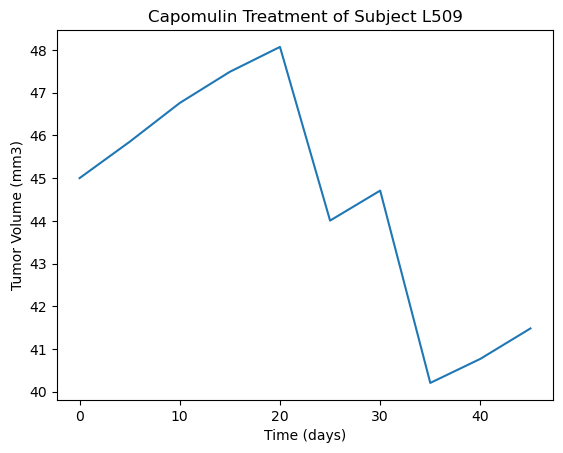

In [21]:
#Generate a time series of tumor volume (mm3) for subject L509 treated with Capomulin
dataset_l509 = dataset_final.loc[dataset_final["Mouse ID"] == "l509"]
dataset_l509.plot(x="Timepoint", y="Tumor Volume (mm3)", kind="line", 
                  title="Capomulin Treatment of Subject L509", legend=False
                 )
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Time (days)")
plt.show()


C:\Users\grant\AppData\Local\Temp\ipykernel_2340\2068451613.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_capo = dataset_final.loc[(dataset_final["Drug Regimen"] == "Capomulin")].groupby("Mouse ID").mean()


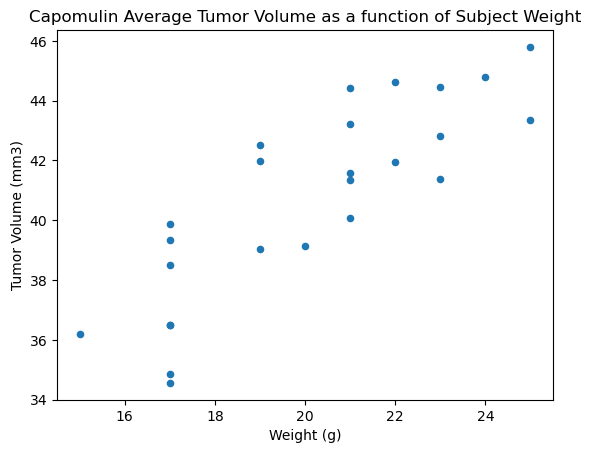

In [22]:
#mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
weight_capo = dataset_final.loc[(dataset_final["Drug Regimen"] == "Capomulin")].groupby("Mouse ID").mean()
weight_capo.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", 
                  title="Capomulin Average Tumor Volume as a function of Subject Weight", legend=False
                 )
plt.show()

## Correlation and Regression

C:\Users\grant\AppData\Local\Temp\ipykernel_2340\2997283420.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weight_capo = dataset_final.loc[(dataset_final["Drug Regimen"] == "Capomulin")].groupby("Mouse ID").mean()


The r-squared is: 0.7088568047708723


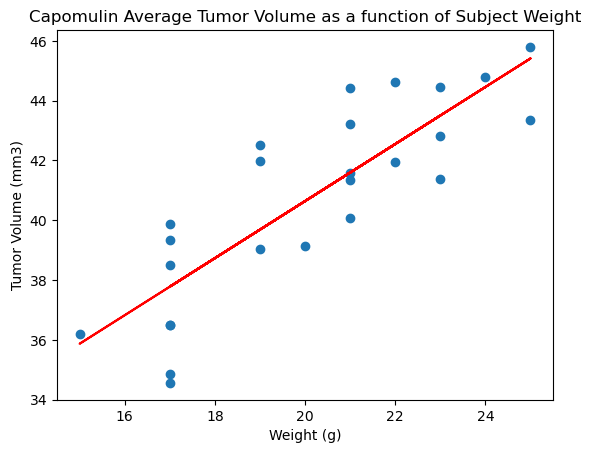

In [23]:
#Correlation and Regression Calculations (taken from Module 5-3 Activity 08)
weight_capo = dataset_final.loc[(dataset_final["Drug Regimen"] == "Capomulin")].groupby("Mouse ID").mean()
weight_capo.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", 
                  title="Capomulin Average Tumor Volume as a function of Subject Weight", legend=False
                 )

x_values = weight_capo["Weight (g)"]
y_values = weight_capo["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

plt.show()